## Q3. (Digital Image Creation - Circles)

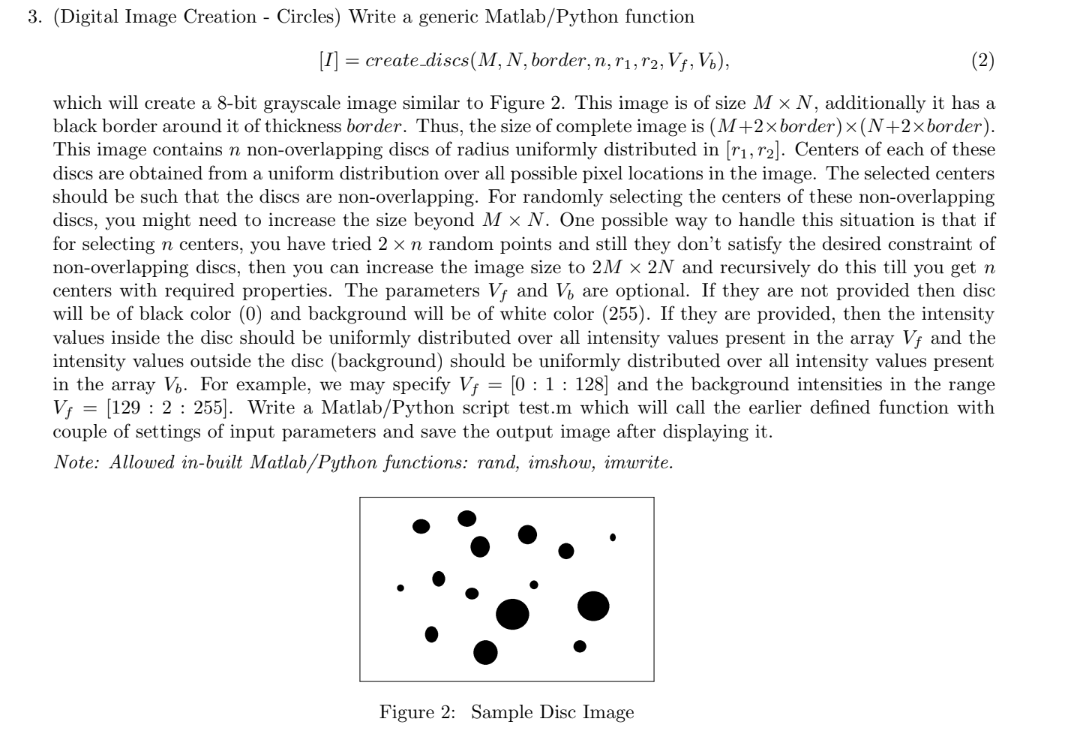

In [1]:
import numpy as np
import sys

# SEED THE RANDOM NUMBER GENERATOR
np.random.seed(0)

def create_discs(M, N, border, n, r1, r2, Vf = None, Vb = None):

    # Check if the arguments are valid
    if M <= 0 or N <= 0 or border < 0 or n <= 0 or r1 <= 0 or r2 <= 0 or r1 > r2:
        print("Invalid Arguments: M, N, border, n, r1, r2 must be positive and r1 <= r2")
        sys.exit(1)
    
    if r1 > M or r1 > N or r2 > M or r2 > N:
        print("Invalid Arguments: r1 or r2 is greater than M or N")
        sys.exit(1)    

    # create a blank image
    img = np.zeros((M + 2*border, N + 2*border), dtype=np.uint8)

    # fill the image with background color
    if Vb is None:
        img.fill(255)
    else:
        for i in range(M + 2*border):
            for j in range(N + 2*border):
                img[i, j] = np.random.choice(Vb)    
                # Fill Border with Black
                if i < border or i >= M + border or j < border or j >= N + border:
                    img[i, j] = 0
    
    # create a list of random centers
    centers = []
    
    tries = 0

    while len(centers) < n:

        # get a random center
        x = np.random.randint(border + r1, M + border - r1)
        y = np.random.randint(border + r1, N + border - r1)
        
        r = np.random.randint(r1, r2+1)
        while (x - r < border) or (x + r >= M + border) or (y - r < border) or (y + r >= N + border):
            r = np.random.randint(r1, r2+1)
        
        tries += 1
        
        if(tries > 2*n):
            print("Tried 2*n points and failed. Trying again with double the size of the image: M =", 2*M, " N =", 2*N)
            # Recursively call the function with double the size of the image
            return create_discs(2*M, 2*N, border, n, r1, r2, Vf, Vb)

        if len(centers) == 0:
            centers.append((x, y, r))
        else:
            # check if the new center is overlapping with any of the existing centers
            flag = True
            for c in centers:
                if((x - c[0])**2 + (y - c[1])**2 <= (r + c[2])**2):
                    flag = False
                    break
            if flag:
                centers.append((x, y, r))
            
    # create discs
    for c in centers:
        
        x = c[0]
        y = c[1]
        r = c[2]
        
        for i in range(x - r, x + r + 1):
            for j in range(y - r, y + r + 1):
                if (i - x)**2 + (j - y)**2 <= r**2:
                    if Vf is None:
                        img[i, j] = 0
                    else:
                        img[i, j] = np.random.choice(Vf)
    return img

In [2]:
# create a 8-bit grayscale image similar to Figure 2
img = create_discs(
    M=256,
    N=256,
    border=10,
    n=10,
    r1=40,
    r2=80,
    Vf=range(0,128, 1),
    Vb=range(129,255, 2)
)

Tried 2*n points and failed. Trying again with double the size of the image: M = 512  N = 512
Tried 2*n points and failed. Trying again with double the size of the image: M = 1024  N = 1024


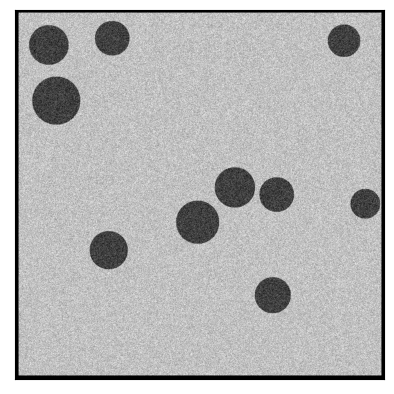

In [3]:
# Plot the image
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')

# X and Y ticks false
plt.xticks([])
plt.yticks([])

# Save the image
plt.imsave('Q3.png', img, cmap='gray')